In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
#s=geopandas.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])

<AxesSubplot:>

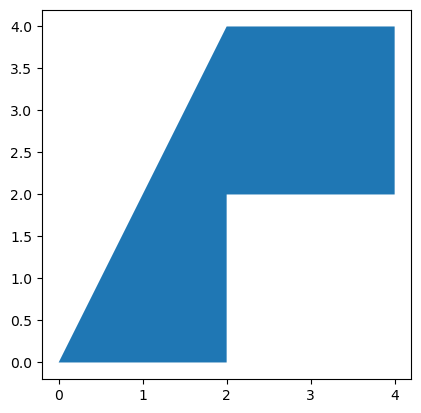

In [2]:
cords=[(0,0),(2,0),(2,2),(0,2),(2,2),(4,2),(4,4),(2,4)]

pl1=Polygon(cords)
g_pl1=gpd.GeoDataFrame(geometry=[pl1])
g_pl1.plot()

<AxesSubplot:>

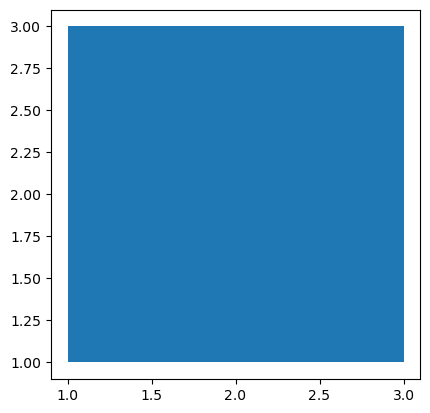

In [4]:
pl1=Polygon([(1,1),(3,1),(3,3),(1,3)])
g_pl2=gpd.GeoDataFrame(geometry=[pl1])
g_pl2.plot()

<AxesSubplot:>

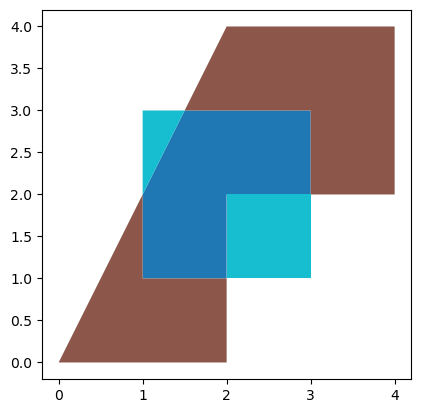

In [5]:
union=gpd.overlay(g_pl1,g_pl2,how='union')
union.plot(cmap='tab10')

<AxesSubplot:>

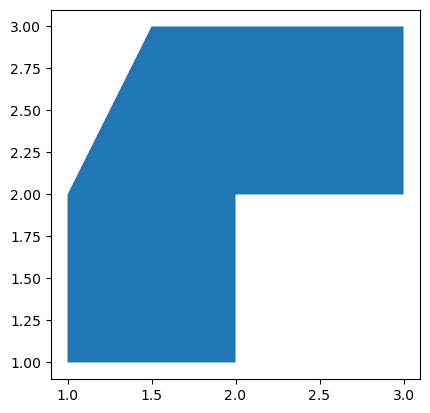

In [6]:
# intersection 
intersection=gpd.overlay(g_pl1,g_pl2,how='intersection')
intersection.plot(cmap='tab10')

In [ ]:



differe=gpd.overlay(g_pl1,g_pl2,how='difference')
differe.plot(cmap='tab10')

# identity 
ide=gpd.overlay(g_pl1,g_pl2,how='identity')
ide.plot()



from shapely.geometry import Point, Polygon

p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly1 = Polygon(coords)
gdf_points = gpd.GeoDataFrame(geometry=[p1,p2])
gdf_poly = gpd.GeoDataFrame(geometry=[poly1])




world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

capitals=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.to_file('capitals.shp')
capitals.plot()


# we want to select asian continent 
A_countries=world[world['continent']=='Asia']
A_countries.plot()
A_countries.to_file("A_countries.shp")

A_countries.plot()

countries=A_countries[['geometry','name']]

countries=countries.to_crs('epsg:3395')

countries.to_crs
capitals.to_crs


#buffer 

capitals['geometry']=capitals.buffer(50000)
capitals.plot()

# difference 
c_I=gpd.overlay(A_countries,capitals,how='difference')
c_I.plot()

#dissolve 
continents=world.dissolve(by='continent')
continents.plot()
continents=world.dissolve(by='continent',aggfunc='sum')
continents.plot(column='pop_est',scheme='quantiles',cmap='YlOrRd')


cities=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))                   

#merge

cgp=world[['iso_a3','gdp_md_est']]

countries=world[['iso_a3','geometry']]

merg=countries.merge(cgp,on='iso_a3')

# spatial sjoin if intersect

cities_coutnries=gpd.sjoin(cities,countries,how='inner',op='intersects')
cities_coutnries.plot()

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap']=world.gdp_md_est/world.pop_est

fig,ax=plt.subplots(1,1)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='gdp_per_cap',ax=ax,legend=True,cax=cax)

plt.title('world GDP per Capita')


base=world.plot(color='white',edgecolor='black')
cities.plot(ax=base,marker='o',color='red',markersize=5)